In [31]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

In [56]:
statistic = 'vpf'

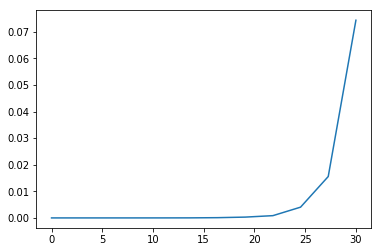

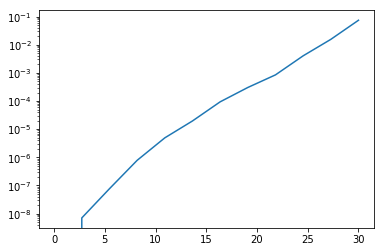

In [10]:
testing_dir = '../../clust/results/testing_{}/'.format(statistic)
GP_error = np.loadtxt(testing_dir+"{}_error.dat".format(statistic))

rads = np.linspace(0, 30, 12)
plt.plot(rads, GP_error)
plt.figure()
plt.semilogy(rads, GP_error)

[0.00000000e+00 1.26244964e-03 6.96439765e-03 1.40031547e-02
 1.70270106e-02 1.38289635e-02 8.00441006e-03 3.42328858e-03
 1.03736558e-03 2.37150053e-04 3.83598423e-05 5.81786043e-06]


Text(0,0.5,'P$_v$(r)')

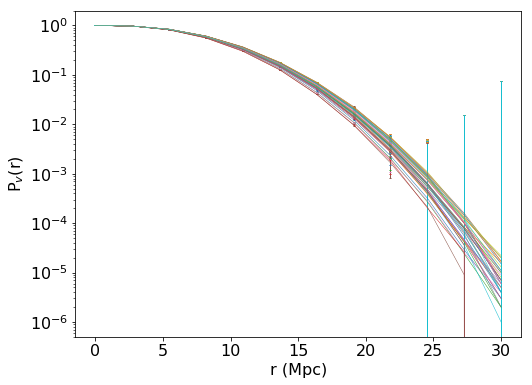

In [41]:
plt.figure()    
ncosmos = 40
ps = []
nbins = 12

for cosmo in range(ncosmos):
    fn = '../../clust/results/training_{}/{}_cosmo_{}_HOD_0_test_0.txt'.format(statistic, statistic, cosmo)
    n, p = np.loadtxt(fn, delimiter=',',unpack=True)
    #plt.semilogy(n, p, marker='o')
    #plt.errorbar(n, p, yerr=0.5+0.75*p, fmt='o')
    ps.append(p)
    
pstd = np.std(np.array(ps), axis=0)
print pstd

for cosmo in range(ncosmos):
    fn = '../../clust/results/training_{}/{}_cosmo_{}_HOD_0_test_0.txt'.format(statistic, statistic, cosmo)
    n, p = np.loadtxt(fn, delimiter=',',unpack=True)
    #plt.semilogy(n, p, marker='o')
    #plt.errorbar(n, p, yerr=pstd, fmt='o')
    plt.errorbar(n[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1)

plt.yscale("log")
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
plt.ylabel(r"P$_v$(r)")

Text(0.5,0,'r (Mpc)')

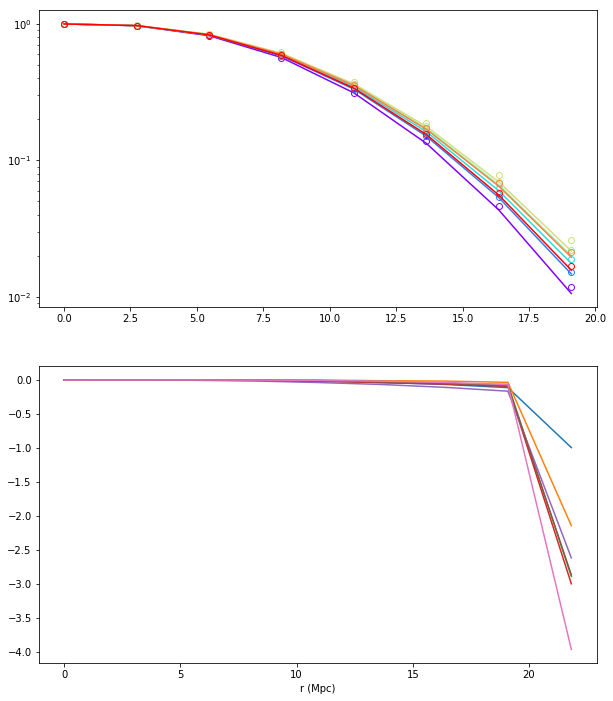

In [5]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10,12), gridspec_kw={'height_ratios': [1, 1]})

n = 7
nbins = 8
color_idx = np.linspace(0, 1, n)
for i in range(n):
    cosmo = i
    color=plt.cm.rainbow(color_idx[i])

    fnt = '../testing_results/tests_vpf/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(cosmo)
    ntest, ptest = np.loadtxt(fnt)
    ax0.semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
    
    fnp = '../testing_results/predictions_vpf/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(cosmo)
    npredic, ppredic = np.loadtxt(fnp)
    ax0.semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
    
    ax1.plot(ntest, (ppredic-ptest)/ptest)
    #ax1.plot(ntest, ppredic/ptest)

plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?

mean: [1.         0.97217343 0.83178814 0.59457757 0.34799929 0.16481357
 0.062342   0.01881343]
predic: [1.00000000e+00 9.70882982e-01 8.20369776e-01 5.67473117e-01
 3.12097345e-01 1.33052019e-01 4.32238939e-02 1.05515278e-02
 1.39840472e-05]


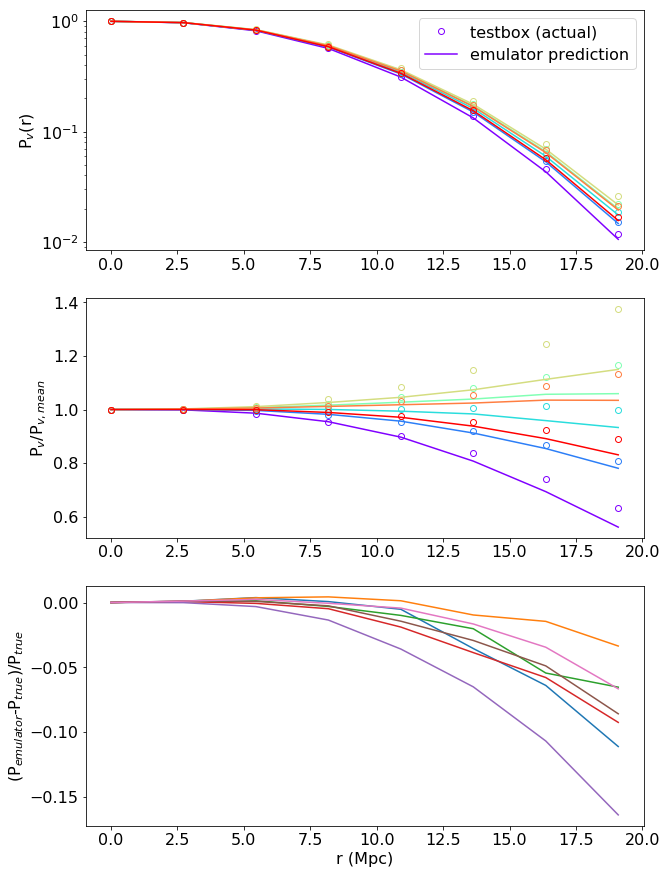

In [69]:
ncols = 3
fig, ax = plt.subplots(3, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

savetag = "_hod0test_gperr"

ncosmos = 7
nbins = 8
color_idx = np.linspace(0, 1, ncosmos)

vpf_mean = np.zeros(nbins)
for i in range(ncosmos):
    cosmo = i
    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    vpf_mean += ptest[:nbins]

vpf_mean /= ncosmos
print "mean:",vpf_mean    

for i in range(ncosmos):
    cosmo = i
    color=plt.cm.rainbow(color_idx[i])

    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    if i==0:
        ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
    else:
        ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
  
    fnp = '../testing_results/predictions_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    npredic, ppredic = np.loadtxt(fnp)
    if i==0:
        print "predic:",ppredic
        ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
    else: 
        ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
    ax[0].set_ylabel(r"P$_v$(r)")
        
    ax[1].plot(ntest[:nbins], ptest[:nbins]/vpf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
    ax[1].plot(npredic[:nbins], ppredic[:nbins]/vpf_mean[:nbins], marker=None, ls='-', color=color)
    ax[1].set_ylabel(r"P$_v$/P$_{v,mean}$")
    
    fracerr = (ppredic-ptest)/ptest
    ax[2].plot(ntest[:nbins], fracerr[:nbins])
    ax[2].set_ylabel(r"(P$_{emulator}$-P$_{true}$)/P$_{true}$")
    #ax1.plot(ntest, ppredic/ptest)

    
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
ax[0].legend()

mean: [1.         0.97217343 0.83178814 0.59457757 0.34799929 0.16481357
 0.062342   0.01881343]
predic: [1.00034935e+00 9.71222833e-01 8.20660607e-01 5.67680208e-01
 3.12217251e-01 1.33107704e-01 4.32443681e-02 1.05574249e-02
 1.86085050e-03 2.53416242e-04 2.02426279e-05 5.61304745e-07]


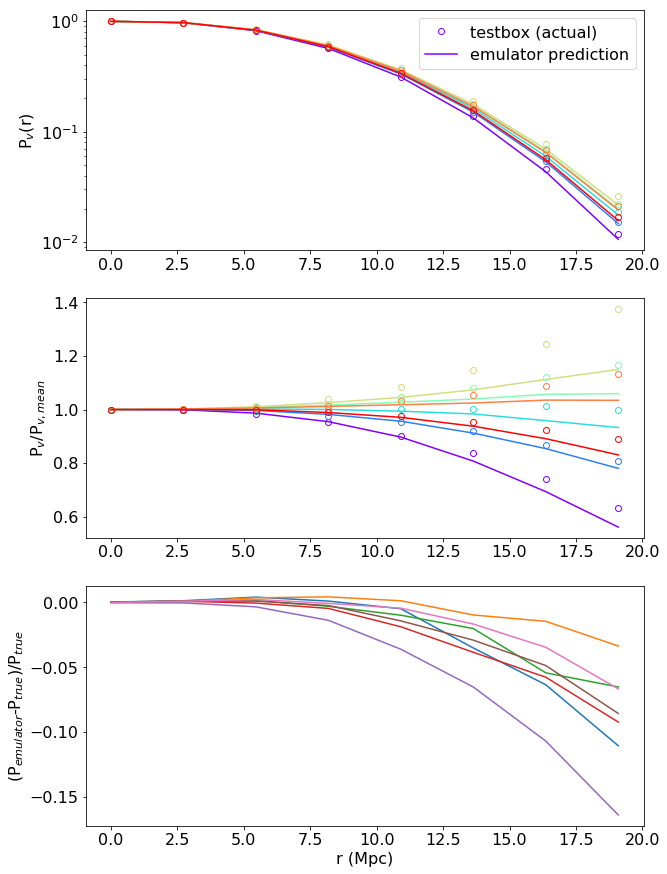

In [68]:
statistic = 'vpf'

ncols = 3
fig, ax = plt.subplots(3, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

savetag = "_hod0_nomean"

ncosmos = 7
nbins = 8
color_idx = np.linspace(0, 1, ncosmos)

vpf_mean = np.zeros(nbins)
for i in range(ncosmos):
    cosmo = i
    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    vpf_mean += ptest[:nbins]

vpf_mean /= ncosmos
print "mean:",vpf_mean

for i in range(ncosmos):
    cosmo = i
    color=plt.cm.rainbow(color_idx[i])

    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    if i==0:
        ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
    else:
        ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
  
    fnp = '../testing_results/predictions_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    npredic, ppredic = np.loadtxt(fnp)
    if i==0:
        print "predic:",ppredic
        ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
    else: 
        ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
    ax[0].set_ylabel(r"P$_v$(r)")
        
    ax[1].plot(ntest[:nbins], ptest[:nbins]/vpf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
    ax[1].plot(npredic[:nbins], ppredic[:nbins]/vpf_mean[:nbins], marker=None, ls='-', color=color)
    ax[1].set_ylabel(r"P$_v$/P$_{v,mean}$")
    
    fracerr = (ppredic-ptest)/ptest
    ax[2].plot(ntest[:nbins], fracerr[:nbins])
    ax[2].set_ylabel(r"(P$_{emulator}$-P$_{true}$)/P$_{true}$")
    #ax1.plot(ntest, ppredic/ptest)

    
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
ax[0].legend()

Text(0.5,0,'r (Mpc)')

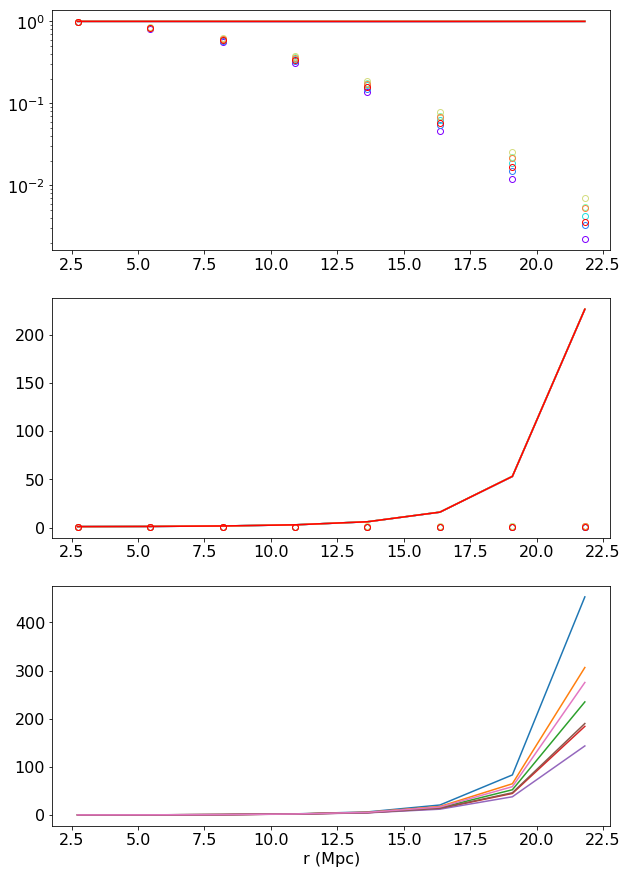

In [75]:
ncols = 3
fig, ax = plt.subplots(3, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

savetag = "_hod0_log"

ncosmos = 7
nbins = 8
color_idx = np.linspace(0, 1, ncosmos)

vpf_mean = np.zeros(nbins)
for cosmo in range(ncosmos):
    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    vpf_mean += ptest[:nbins]

vpf_mean /= ncosmos
    
for cosmo in range(ncosmos):
    color=plt.cm.rainbow(color_idx[cosmo])

    fnt = '../testing_results/tests_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    ntest, ptest = np.loadtxt(fnt)
    ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
    
    fnp = '../testing_results/predictions_vpf{}/vpf_cosmo_{}_Box_0_HOD_0_test_0.dat'.format(savetag, cosmo)
    npredic, ppredic = np.loadtxt(fnp)
    
    ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
    
    ax[1].plot(ntest[:nbins], ptest[:nbins]/vpf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
    ax[1].plot(npredic[:nbins], ppredic[:nbins]/vpf_mean[:nbins], marker=None, ls='-', color=color)
    
    fracerr = (ppredic-ptest)/ptest
    ax[2].plot(ntest[:nbins], fracerr[:nbins])
    #ax1.plot(ntest, ppredic/ptest)

    
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?

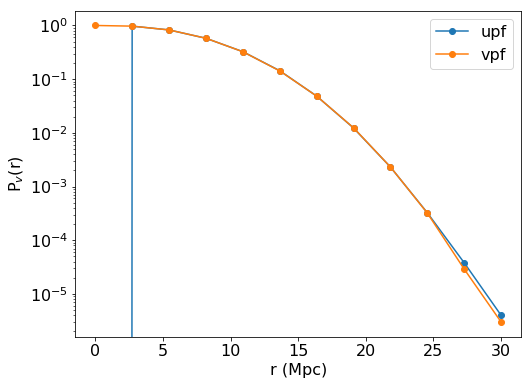

In [74]:
plt.figure()    
ncosmos = 1
ps = []
nbins = 12

statistics = ['upf', 'vpf']

for statistic in statistics:

    for cosmo in range(ncosmos):
        fn = '../../clust/results/training_{}/{}_cosmo_{}_HOD_0_test_0.dat'.format(statistic, statistic, cosmo)
        n, p = np.loadtxt(fn, delimiter=',',unpack=True)
        plt.semilogy(n, p, marker='o', label=statistic)
        #plt.errorbar(n, p, yerr=pstd, fmt='o')
        #plt.errorbar(n[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, label=statistic)

plt.yscale("log")
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
plt.ylabel(r"P$_v$(r)")
plt.legend()

[ 0.        2.727273  5.454545  8.181818 10.909091 13.636364 16.363636
 19.090909 21.818182 24.545455 27.272727 30.      ] [0.00000e+00 9.71527e-01 8.26262e-01 5.77415e-01 3.25257e-01 1.43542e-01
 4.84390e-02 1.23310e-02 2.31200e-03 3.25000e-04 3.80000e-05 4.00000e-06]
[ 0.        2.727273  5.454545  8.181818 10.909091 13.636364 16.363636
 19.090909 21.818182 24.545455 27.272727 30.      ] [0.00000e+00 9.73259e-01 8.36290e-01 6.00978e-01 3.53985e-01 1.70031e-01
 6.62760e-02 2.00270e-02 4.77600e-03 9.37000e-04 1.11000e-04 4.00000e-06]
[ 0.        2.727273  5.454545  8.181818 10.909091 13.636364 16.363636
 19.090909 21.818182 24.545455 27.272727 30.      ] [0.00000e+00 9.70414e-01 8.19963e-01 5.67287e-01 3.11987e-01 1.33700e-01
 4.40570e-02 1.08770e-02 2.04800e-03 2.87000e-04 2.00000e-05 1.00000e-06]
[ 0.        2.727273  5.454545  8.181818 10.909091 13.636364 16.363636
 19.090909 21.818182 24.545455 27.272727 30.      ] [0.00000e+00 9.71211e-01 8.24913e-01 5.77414e-01 3.25843e-01 1.4549

Text(0,0.5,'P$_v$(r)')

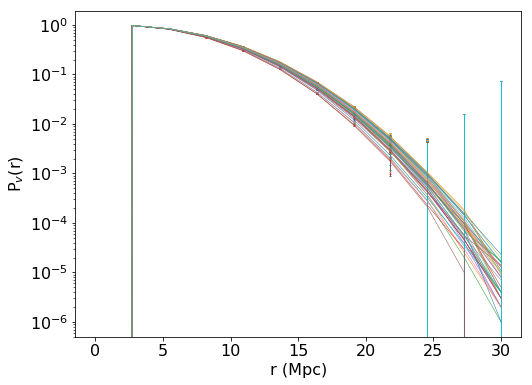

In [60]:
plt.figure()    
ncosmos = 40
ps = []
nbins = 12

statistic = 'upf'

for cosmo in range(ncosmos):
    fn = '../../clust/results/training_{}/{}_cosmo_{}_HOD_0_test_0.dat'.format(statistic, statistic, cosmo)
    n, p = np.loadtxt(fn, delimiter=',',unpack=True)
    print n, p
    #plt.semilogy(n, p, marker='o')
    #plt.errorbar(n, p, yerr=0.5+0.75*p, fmt='o')
    ps.append(p)
    
    
pstd = np.std(np.array(ps), axis=0)
print pstd

for cosmo in range(ncosmos):
    fn = '../../clust/results/training_{}/{}_cosmo_{}_HOD_0_test_0.dat'.format(statistic, statistic, cosmo)
    n, p = np.loadtxt(fn, delimiter=',',unpack=True)
    #plt.semilogy(n, p, marker='o')
    #plt.errorbar(n, p, yerr=pstd, fmt='o')
    plt.errorbar(n[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1)

plt.yscale("log")
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
plt.ylabel(r"P$_v$(r)")